<a href="https://colab.research.google.com/github/datascience-vivek/Support_Vector_Machine/blob/main/SVM_cmentslum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Sagar-modelling/ML_Live_Class/main/data/cement_slump.csv")

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


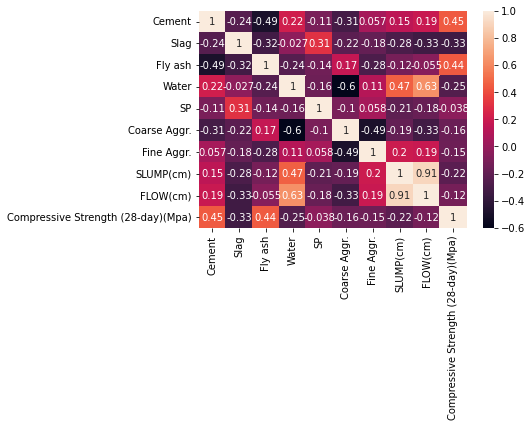

In [5]:
sns.heatmap(df.corr(), annot =True)

In [7]:
x = df.drop('Compressive Strength (28-day)(Mpa)', axis = 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.3, random_state= 101)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaled_x_train=scaler.fit_transform(x_train)


In [12]:
scaled_x_test= scaler.transform(x_test)

In [14]:
from sklearn.svm import SVR, LinearSVR##Linear Kernal

In [16]:
base_model = SVR()

In [17]:
base_model.fit(scaled_x_train, y_train)

SVR()

In [19]:
base_preds = base_model.predict(scaled_x_test)
base_preds

array([33.54538508, 36.88488329, 35.31862535, 34.4982983 , 38.78862684,
       37.28692733, 34.70488018, 37.45383093, 38.5643203 , 40.60987705,
       36.12704821, 33.47125341, 33.80688776, 35.57395401, 39.06389895,
       39.20405978, 38.73343751, 36.38267762, 32.54415537, 34.41850278,
       37.08595015, 35.95245982, 35.172924  , 32.85268464, 38.10884757,
       36.35378576, 34.496466  , 33.01047764, 36.06717968, 35.99982788,
       34.58986779])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [22]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [23]:
y_test.mean()

36.26870967741935

In [24]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C': [0.001, 0.01, 0.5, 1], 'kernel':['linear', 'rbf', 'poly'], 'gamma':['scale', 'auto'], 'degree':[2,3,4], 'epsilon': [0,0.01,0.1, 1, 2]}

In [29]:
svr =SVR()

In [30]:
grid_model = GridSearchCV(svr, param_grid)

In [31]:
grid_model.fit(scaled_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [32]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [33]:
grid_preds = grid_model.predict(scaled_x_test)

In [35]:
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [36]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.178210305119858